**(1)Analytical Implementation of Black Scholes**

In [2]:
from scipy.stats import norm
import numpy as np
import scipy as scp


r = 0.13
S = 200
K = 150
T1 = 1
sigma = 0.05



Option price is 68.2856853619158


In [3]:
def blackscholes(r,S,K,T,sigma,type="C"):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    try:
        if type == "C":
            price = S*norm.cdf(d1,0,1)- K*np.exp(-r*T)*norm.cdf(d2,0,1)
        elif type == "P":
            price = K * np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
        return price
    except:
        print("Confirm Parameters")
print('Option price is',blackscholes(r,S,K,T1,sigma,type="C"))  

Option price is 68.2856853619158


**(2) Comparison of Numerical and Analytical Method**

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib inline

from scipy import sparse
from scipy.sparse.linalg import splu
from scipy.sparse.linalg import spsolve

from IPython.display import display
import sympy; sympy.init_printing()
import random

def display_matrix(m):
    display(sympy.Matrix(m))

**Numerical Solution**

In [2]:
r = 0.13; sig = 0.05                
S0 = 100; X0 = np.log(S0)          
K = 150; Texpir = 1
Nspace = 100   # M space steps
Ntime = 100    # N time steps   

S_max = 2*float(K)                
S_min = float(K)/2

x_max = np.log(S_max)  # A2
x_min = np.log(S_min)  # A1
    
x, dx = np.linspace(x_min, x_max, Nspace, retstep=True)   # space discretization
T, dt = np.linspace(0, Texpir, Ntime, retstep=True)       # time discretization


In [3]:
def Implicit(r , sig , S0 ,X0 , K , Texpir):
    Nspace = 100   # M space steps
    Ntime = 100    # N time steps   

    S_max = 2*float(K)                
    S_min = float(K)/2

    x_max = np.log(S_max)  # A2
    x_min = np.log(S_min)  # A1
    
    x, dx = np.linspace(x_min, x_max, Nspace, retstep=True)   # space discretization
    T, dt = np.linspace(0, Texpir, Ntime, retstep=True)       # time discretization
    Payoff = np.maximum(np.exp(x)-K,0)          # Call payoff
    V = np.zeros((Nspace,Ntime))       # grid initialization
    offset = np.zeros(Nspace-2)        # vector to be used for the boundary terms   

    V[:,-1] = Payoff                   # terminal conditions 
    V[-1,:] = np.exp(x_max) - K * np.exp(-r* T[::-1] )  # boundary condition
    V[0,:] = 0                         # boundary condition
    
    sig2 = sig*sig; dxx = dx * dx

    a = ( (dt/2) * ( (r-0.5*sig2)/dx - sig2/dxx ) )
    b = ( 1 + dt * ( sig2/dxx + r ) )
    c = (-(dt/2) * ( (r-0.5*sig2)/dx + sig2/dxx ) )

    D = sparse.diags([a, b, c], [-1, 0, 1], shape=(Nspace-2, Nspace-2)).tocsc()
    
    # Backward iteration
    for i in range(Ntime-2,-1,-1):
        offset[0] = a * V[0,i]
        offset[-1] = c * V[-1,i]; 
        V[1:-1,i] = spsolve( D, (V[1:-1,i+1] - offset) )
        
    # finds the option at S0
    oPrice = np.interp(X0, x, V[:,0])
    S = np.exp(x)
    fig = plt.figure(figsize=(15,6))
    ax2 = fig.add_subplot(122, projection='3d')


    X, Y = np.meshgrid(T, S)
    ax2.plot_surface(Y, X, V, cmap=cm.ocean)
    ax2.set_title("BS price surface(Numerical)")
    ax2.set_xlabel("S"); ax2.set_ylabel("t"); ax2.set_zlabel("V")
    ax2.view_init(30, 130) # this function rotates the 3d plot
    plt.show()
    return oPrice , V    

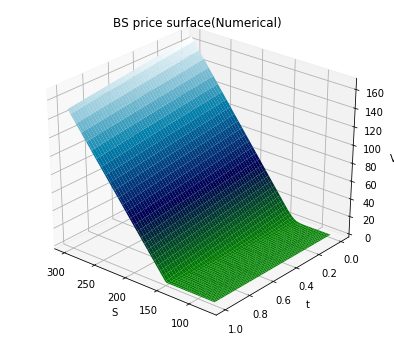

In [4]:
C,V = Implicit(r , sig , S0 ,X0 , K , Texpir)

**Benchmark using Numerical Scheme**

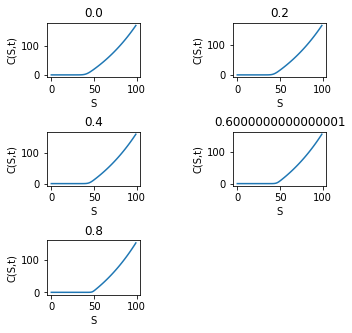

In [5]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=1, wspace=1)
K = np.arange(0,100,20)
T = np.arange(0, 1.2, 0.2)
for i in range(len(K)):
    plt.subplot(3, 2, i+1)
    plt.plot(V[:,K[i]])
    plt.xlabel('S')
    plt.ylabel('C(S,t)')
    plt.title(T[i])
    #plt.show()

**Analytical Solution**

In [6]:
from scipy.stats import norm


r = 0.13
S = 200
K = 150
T1 = 1
sigma = 0.05

def blackscholes(r,S,K,T,sigma,type="C"):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    try:
        if type == "C":
            price = S*norm.cdf(d1,0,1)- K*np.exp(-r*T)*norm.cdf(d2,0,1)
        elif type == "P":
            price = K * np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
        return price
    except:
        print("Confirm Parameters")
print('Option price is',blackscholes(r,S,K,T1,sigma,type="C"))  

Option price is 68.2856853619158


In [7]:
def timestep(T):
    S1 = np.exp(x)
    U_0_new = []
    
    for i in range(len(S1)):
        U_0_new.append(blackscholes(0.13,S1[i],150,T,0.05,type="C"))
    U_0_new = np.array(U_0_new)
    #plt.show()
    return U_0_new

**Benchmark Using Analytical Method**

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


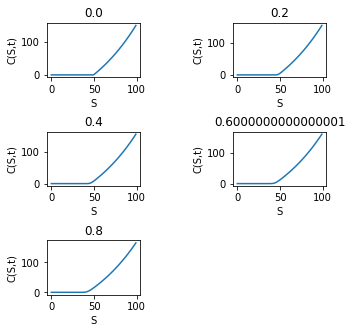

In [8]:
U_new = []
T = np.arange(0, 1, 0.2)
for i in range(len(T)):
    U_new.append(timestep(T[i]))
    
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=1, wspace=1)    
for i in range(5):    
    plt.subplot(3, 2, i+1)
    plt.plot (U_new[i])
    plt.xlabel('S')
    plt.ylabel('C(S,t)')
    plt.title(T[i])


**Effect of time on Option value**

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


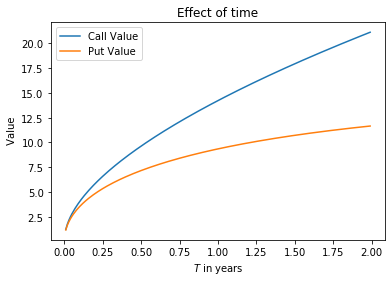

In [10]:

K = 100
r = 0.05
T = np.arange(0, 2, 0.01)
sigma = 0.3
S = 100

calls = [blackscholes(r,S,K,t,sigma,type="C") for t in T]
puts = [blackscholes(r,S,K,t,sigma,type="P") for t in T]
plt.plot(T, calls, label='Call Value')
plt.plot(T, puts, label='Put Value')
plt.xlabel('$T$ in years')
plt.ylabel(' Value')
plt.title('Effect of time')
plt.legend()
plt.show()

**(3) Implied Volatility and Volatility smile**

In [11]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize_scalar   
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import requests
import responses
import requests

In [12]:
import yfinance as yf
nflx = yf.Ticker("NFLX")

In [13]:
nflx.options

('2022-05-20',
 '2022-05-27',
 '2022-06-03',
 '2022-06-10',
 '2022-06-17',
 '2022-06-24',
 '2022-07-01',
 '2022-07-15',
 '2022-08-19',
 '2022-09-16',
 '2022-11-18',
 '2022-12-16',
 '2023-01-20',
 '2023-03-17',
 '2023-06-16',
 '2024-01-19')

In [14]:
opt = nflx.option_chain('2024-01-19')

In [15]:
calls = opt.calls

In [16]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,NFLX240119C00050000,2022-05-17 16:05:45+00:00,50.0,144.12,0.0,0.0,0.0,0.0,1,0,0.000010,True,REGULAR,USD
1,NFLX240119C00060000,2022-05-16 18:35:18+00:00,60.0,137.25,0.0,0.0,0.0,0.0,3,0,0.000010,True,REGULAR,USD
2,NFLX240119C00070000,2022-05-06 17:47:03+00:00,70.0,121.26,0.0,0.0,0.0,0.0,3,0,0.000010,True,REGULAR,USD
3,NFLX240119C00080000,2022-05-12 15:41:21+00:00,80.0,107.67,0.0,0.0,0.0,0.0,2,0,0.000010,True,REGULAR,USD
4,NFLX240119C00090000,2022-05-16 18:25:53+00:00,90.0,113.50,0.0,0.0,0.0,0.0,1,0,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,NFLX240119C01225000,2022-05-10 18:16:15+00:00,1225.0,0.55,0.0,0.0,0.0,0.0,1,0,0.250007,False,REGULAR,USD
116,NFLX240119C01250000,2022-05-05 15:52:10+00:00,1250.0,0.55,0.0,0.0,0.0,0.0,3,0,0.250007,False,REGULAR,USD
117,NFLX240119C01275000,2022-05-17 16:29:32+00:00,1275.0,0.49,0.0,0.0,0.0,0.0,51,0,0.250007,False,REGULAR,USD
118,NFLX240119C01300000,2022-05-17 18:37:09+00:00,1300.0,0.51,0.0,0.0,0.0,0.0,1,0,0.250007,False,REGULAR,USD


In [17]:
N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)    
    

def implied_vol(opt_value, S, K, T, r, type_='call'):
    
    def call_obj(sigma):
        return abs(BS_CALL(S, K, T, r, sigma) - opt_value)
    
    def put_obj(sigma):
        return abs(BS_PUT(S, K, T, r, sigma) - opt_value)
    
    if type_ == 'call':
        res = minimize_scalar(call_obj, bounds=(0.01,6), method='bounded')
        return res.x
    elif type_ == 'put':
        res = minimize_scalar(put_obj, bounds=(0.01,6),
                              method='bounded')
        return res.x
    else:
        raise ValueError("type_ must be 'put' or 'call'")

In [18]:
strike = calls["strike"]
IV = calls["impliedVolatility"]
Spot = calls["lastPrice"]

In [19]:
T = np.arange(0,2,0.0204)
len(T)

In [77]:
C = []
for i in range(len(T)):
    C.append(BS_CALL(Spot[i], strike[i], T[i], 0.5, IV[i]))
ivs = []
for i in range(len(T)):
    iv = implied_vol(C[i], Spot[i], strike[i], 2,0.5)
    ivs.append(iv)

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


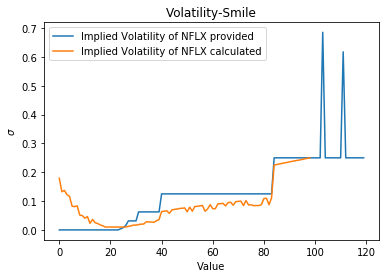

In [79]:
plt.plot(IV,label='Implied Volatility of NFLX provided')
plt.plot(ivs,label='Implied Volatility of NFLX calculated')
plt.xlabel('Value')
plt.ylabel('$\sigma$')
plt.title('Volatility-Smile')
plt.legend()
plt.show()

In [22]:
Civ = []
for i in range(len(T)):
    Civ.append(BS_CALL(Spot[i], strike[i], T[i], 0.5, ivs[i]))

C:\Users\affan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


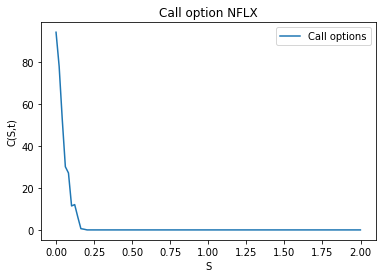

In [23]:
plt.plot(T,Civ,label='Call options')
plt.xlabel('S')
plt.ylabel('C(S,t)')
plt.title('Call option NFLX')
plt.legend()

**(4) Trading Strategies**
https://www.codearmo.com/python-tutorial/options-trading-bull-and-bear-spread-strategies
    
**Code is taken from this website**

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 

In [25]:
class Option:
    def __init__(self, type_, K, price, side):
        self.type = type_
        self.K = K
        self.price = price
        self.side = side
    
    def __repr__(self):
        side = 'long' if self.side == 1 else 'short'
        return f'Option(type={self.type},K={self.K}, price={self.price},side={side})'

class OptionStrat:
    def __init__(self, name, S0, params=None):
        self.name = name
        self.S0 = S0
        if params:
            self.STs=np.arange(params.get('start',0),
                               params.get('stop', S0*2), params.get('by',1))
        else:
            self.STs = np.arange(0, S0*2, 1)
        self.payoffs = np.zeros_like(self.STs)
        self.instruments = [] 
           
    def long_call(self, K, C, Q=1):

        payoffs =  np.array([max(s-K,0)  - C for s in self.STs])*Q
        self.payoffs = self.payoffs +payoffs
        self._add_to_self('call', K, C, 1, Q)
    
    def short_call(self, K, C, Q=1):
        payoffs =  np.array([max(s-K,0) * -1 + C for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('call', K, C, -1, Q)
    
    def long_put(self, K, P, Q=1):
        payoffs = np.array([max(K-s,0) - P for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('put', K, P, 1, Q)
      
    def short_put(self, K, P, Q=1):
        payoffs = np.array([max(K-s,0)*-1 + P for s in self.STs])*Q
        self.payoffs = self.payoffs + payoffs
        self._add_to_self('put', K, P, -1, Q)
        
    def _add_to_self(self, type_, K, price, side, Q):
        o = Option(type_, K, price, side)
        for _ in range(Q):
            self.instruments.append(o)
        
          
    def plot(self, **params):
        plt.plot(self.STs, self.payoffs,**params)
        plt.title(f"Payoff Diagram for {self.name}")
        plt.fill_between(self.STs, self.payoffs,
                         where=(self.payoffs >= 0), facecolor='g', alpha=0.4)
        plt.fill_between(self.STs, self.payoffs,
                         where=(self.payoffs < 0), facecolor='r', alpha=0.4)
        
        plt.xlabel(r'$S_T$')
        plt.ylabel('Profit in $')
        plt.show()
        
    def describe(self):
        max_profit  = self.payoffs.max()
        max_loss = self.payoffs.min()
        print(f"Max Profit: ${round(max_profit,3)}")
        print(f"Max loss: ${round(max_loss,3)}")
        c = 0
        for o in self.instruments:
            print(o)
            if o.type == 'call' and o.side==1:
                c += o.price
            elif o.type == 'call' and o.side == -1:
                c -= o.price
            elif o.type =='put' and o.side == 1:
                c += o.price
            elif o.type =='put' and o.side == -1:
                c -+ o.price
        
        print(f"Cost of entering position ${c}")

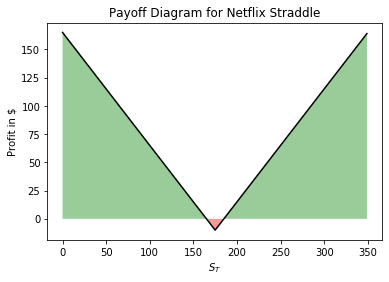

In [26]:
obj = OptionStrat('Netflix Straddle', 175)
obj.long_put(175,5)
obj.long_call(175, 5)
obj.plot(color='black')

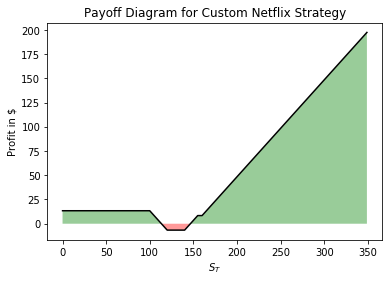

In [27]:
obj = OptionStrat('Custom Netflix Strategy', 175)
obj.long_call(160,2, 1)
obj.long_call(140,4 , 1)
obj.short_call(155,0.75,1)
obj.long_put(120, 2, 1)
obj.short_put(100, 0.65, 1)
obj.plot(color='black')

**(5) Comparison between hestons and BS model**

Code is taken from QuantLib library and inbuilt functions are used

In [28]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps, cumtrapz, romb
%matplotlib inline

In [42]:
# option parameters
strike_price = 110.0
payoff = ql.PlainVanillaPayoff(ql.Option.Call, strike_price)
# option data
maturity_date = ql.Date(15, 1, 2024)
spot_price = 127.62
strike_price = 130
volatility = 0.20 # the historical vols for a year
dividend_rate =  0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8, 5, 2022)
ql.Settings.instance().evaluationDate = calculation_date

In [43]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [44]:
# construct the Heston process

v0 = volatility*volatility  # spot variance
kappa = 0.1
theta = v0
sigma = 0.1
rho = -0.75

spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
heston_process = ql.HestonProcess(flat_ts,
                                  dividend_yield,
                                  spot_handle,
                                  v0,
                                  kappa,
                                  theta,
                                  sigma,
                                  rho)

In [45]:
engine = ql.AnalyticHestonEngine(ql.HestonModel(heston_process),0.01, 1000)
european_option.setPricingEngine(engine)
h_price = european_option.NPV()
print ("The Heston model price is",h_price)

The Heston model price is 9.874999039942828


In [46]:
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print ("The Black-Scholes-Merton model price is ", bs_price)

The Black-Scholes-Merton model price is  10.509100772000188
